In [1]:
import numpy as np
from scipy.stats import norm, t

In [2]:
np.random.seed(1)

In [3]:
N = 1000 # sample size
mu = 5
sigma = 2
X = np.random.randn(N)*sigma + mu 
# samples from a normal distribution with mu and variance sigma squared
# np.random.randn(N) generates a sample of size 1000 from 
# standard normal distribution
# it is multiplied by std and added by mean to get actual observations

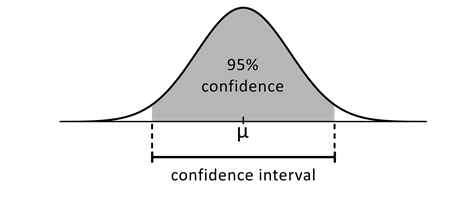

In [4]:
# Z confidence interval 
mu_hat = np.mean(X) #sample mean
sigma_hat = np.std(X, ddof = 1) #sample standard deviation
z_left = norm.ppf(0.025) #the z score such that the area to the left is 2.5%
z_right = norm.ppf(0.975) # the z score such that area to the left is 
lower = mu_hat + z_left * sigma_hat / np.sqrt(N) # lower confidence limit
upper = mu_hat + z_right * sigma_hat / np.sqrt(N) # upper confidence limit
print("Sample mean:", round(mu_hat,2), "Lower confidence limit:", round(lower,2), "Upper confidence limit:", round(upper,2))

Sample mean: 5.08 Lower confidence limit: 4.96 Upper confidence limit: 5.2


In [5]:
# t confidence interval 
mu_hat = np.mean(X) #sample mean
sigma_hat = np.std(X, ddof = 1) #sample standard deviation
t_left = t.ppf(0.025, df = N-1) #the t score such that the area to the left is 2.5%
t_right = t.ppf(0.975, df = N-1) # the t score such that area to the left is 
lower = mu_hat + t_left * sigma_hat / np.sqrt(N) # lower confidence limit
upper = mu_hat + t_right * sigma_hat / np.sqrt(N) # upper confidence limit
print("Sample mean:", round(mu_hat,2), "Lower confidence limit:", round(lower,2), "Upper confidence limit:", round(upper,2))

Sample mean: 5.08 Lower confidence limit: 4.96 Upper confidence limit: 5.2


### Acccording to the theory of confidence interval, the confidence interval should include the true value of the parameter 95% of the time.

In [6]:
def experiment():
    X = np.random.randn(N)*sigma + mu 
    mu_hat = np.mean(X) #sample mean
    sigma_hat = np.std(X, ddof = 1) 
    t_left = t.ppf(0.025, df = N-1) 
    t_right = t.ppf(0.975, df = N-1) 
    lower = mu_hat + t_left * sigma_hat / np.sqrt(N) 
    upper = mu_hat + t_right * sigma_hat / np.sqrt(N) 
    return mu > lower and mu < upper # checking if popn mean lies in interval 

In [9]:
results = []
for i in range(10000):
    results.append(experiment())
np.mean(results)    

0.9499